In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [22]:
example_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

#example_dataset

In [23]:
for (img, label) in example_dataset:
    print(img.numpy().shape, label.numpy())
    break
    

(28, 28) 5


In [24]:
def normalize_img(image, label):
    return (tf.cast(image, tf.float32)/255.0, label)

example_dataset = example_dataset.map(normalize_img,num_parallel_calls=tf.data.AUTOTUNE)

example_dataset

<_ParallelMapDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [25]:
example_dataset = example_dataset.cache()

In [26]:
example_dataset = example_dataset.shuffle(len(example_dataset))


In [27]:
example_dataset = example_dataset.batch(64)
for (img, label) in example_dataset:
    print(img.numpy().shape, label.numpy())
    break

(64, 28, 28) [7 9 3 4 5 8 0 3 3 6 9 3 6 7 3 0 2 7 1 9 5 2 1 7 2 9 8 0 9 0 1 1 7 7 1 7 8
 7 8 7 9 9 6 6 1 9 6 0 9 2 9 1 9 3 2 9 7 7 6 6 7 3 4 6]


In [28]:
example_dataset = example_dataset.prefetch(tf.data.AUTOTUNE)

example_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.cache()

train_dataset = train_dataset.shuffle(len(train_dataset))
train_dataset = train_dataset.batch(64)

train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [30]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(64)
test_dataset = test_dataset.cache()

test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = Sequential()
model.add(layers.InputLayer(input_shape=(28, 28)))
model.add(layers.Reshape((28,28, 1))) #Convolutional NN requires 3D ?
#Build convolutional layers
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
#Build NN
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2 (0.01)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2 (0.01)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2 (0.01)))
model.add(layers.Dense(10, activation='linear', kernel_regularizer=regularizers.L2 (0.01))) #softmax to predict probablities

model.summary()




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_4 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 22, 22, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 20, 20, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 18, 18, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 8)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,146 (20.10 KB)

 Trainable params: 5,146 (20.10 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.optimizers import Adam


model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

In [34]:
model.fit(
    train_dataset,
    epochs=100,
    validation_data = test_dataset,
    callbacks=[es]
)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2305 - loss: 2.3667 - val_accuracy: 0.5176 - val_loss: 1.4689
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5205 - loss: 1.4585 - val_accuracy: 0.5433 - val_loss: 1.3424
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6198 - loss: 1.2037 - val_accuracy: 0.6880 - val_loss: 1.0425
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6818 - loss: 1.0427 - val_accuracy: 0.6999 - val_loss: 0.9979
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7078 - loss: 0.9745 - val_accuracy: 0.7248 - val_loss: 0.9165
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7274 - loss: 0.9147 - val_accuracy: 0.7377 - val_loss: 0.8719
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7515 - loss: 0.8445 - val_accuracy: 0.8016 - val_loss: 0.7315
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7871 - loss: 0.7567 - val

In [336]:
#print(model.predict(X_test)[:3])
print(np.argmax(model.predict(X_test)[2]))
print(y_test[0])
print(y_test[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0
7
2


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[ -998.76044 -1226.7708   -719.8036  -1179.7139    475.432   -1631.0311
 -5004.514    1682.353   -1977.2888    907.6364 ] 
7 
Y test = 7


(28, 28)

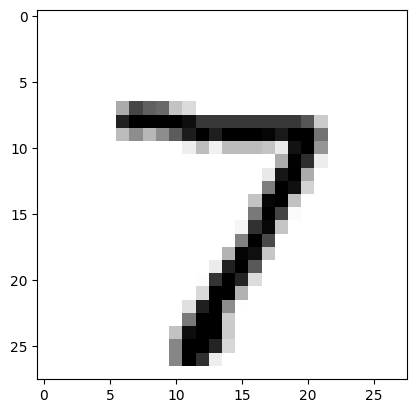

In [337]:
import matplotlib.pyplot as plt

i = 0
plt.imshow((X_test)[i], cmap=plt.cm.binary)
predA = (model.predict(X_test)[i])
pred = np.argmax(predA)

print(f"{predA} \n{pred} \nY test = {y_test[i]}")

X_test[i].shape

In [339]:
model.save('NNtest_model.keras')

In [338]:
model.evaluate(test_dataset)

  2/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9844 - loss: 0.0374

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9627 - loss: 0.1310


[0.11500250548124313, 0.9668999910354614]

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=uint8)
  • training=False
  • mask=None